In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as pl
%matplotlib inline
import seaborn as sns
import math
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

In [6]:
#Question 2A
data = {'Output Q':[80,150,135,165,95,130,110],
         'Labour L':[60,100,100,120,70,90,80],
         'Capital K':[50,100,80,100,60,80,70],
         'Country':['B','C','D','E','F','G','H']
        }
douglas = pd.DataFrame(data,columns = ['Country','Output Q','Labour L','Capital K'])

In [7]:
douglas

,Country,Output Q,Labour L,Capital K
0,B,80,60,50
1,C,150,100,100
2,D,135,100,80
3,E,165,120,100
4,F,95,70,60
5,G,130,90,80
6,H,110,80,70


In [8]:
douglas.describe()

,Output Q,Labour L,Capital K
count,7.000000,7.000000,7.000000
mean,123.571429,88.571429,77.142857
std,30.237158,20.354010,18.898224
min,80.000000,60.000000,50.000000
25%,102.500000,75.000000,65.000000
50%,130.000000,90.000000,80.000000
75%,142.500000,100.000000,90.000000
max,165.000000,120.000000,100.000000


In [9]:
douglas.var()

Output Q     914.285714
Labour L     414.285714
Capital K    357.142857
dtype: float64

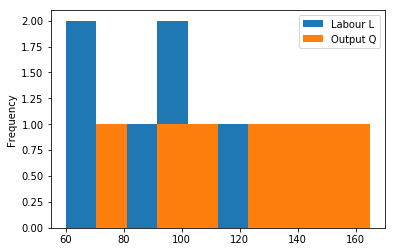

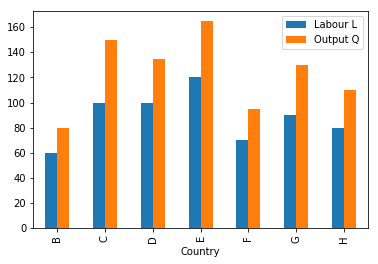

In [10]:
#Question 2B
Dataframe2 = pd.DataFrame(data,columns = ['Country','Output Q','Labour L'])
QL = Dataframe2.pivot_table (index = ['Country'])
QL.plot.hist()
QL.plot.bar(style = 'b')

In [11]:
#Question 2B
piv = QL.pivot_table (index = ['Country'])
piv

,Labour L,Output Q
Country,,
B,60,80
C,100,150
D,100,135
E,120,165
F,70,95
G,90,130
H,80,110


In [12]:
#Question 2c
Q = douglas['Output Q']
L = douglas['Labour L']
K = douglas['Capital K']

np.log(L)
np.log(Q)
np.log(K)

0    3.912023
1    4.605170
2    4.382027
3    4.605170
4    4.094345
5    4.382027
6    4.248495
Name: Capital K, dtype: float64

In [13]:
#Question 2c 
douglas['logQ'] = [math.log(x) for x in Q ]
douglas['logL'] = [math.log(x) for x in L ]
douglas['logK'] = [math.log(x) for x in K ]
douglas

,Country,Output Q,Labour L,Capital K,logQ,logL,logK
0,B,80,60,50,4.382027,4.094345,3.912023
1,C,150,100,100,5.010635,4.605170,4.605170
2,D,135,100,80,4.905275,4.605170,4.382027
3,E,165,120,100,5.105945,4.787492,4.605170
4,F,95,70,60,4.553877,4.248495,4.094345
5,G,130,90,80,4.867534,4.499810,4.382027
6,H,110,80,70,4.700480,4.382027,4.248495


In [14]:
#Question 2D

regression1 = LinearRegression()
x_train = douglas[['logL', 'logK']]
y_train = douglas['logQ']

In [15]:
#Question 2D
regression1 = regression1.fit(x_train, y_train)
A = regression1.intercept_
Alpha = regression1.coef_[0]
Beta = regression1.coef_[1]
print('ln(Q) = ln({}) + {}*ln(L) + {}*ln(K)'.format(A, Alpha, Beta))
print('A=',A,'Alpha=',Alpha,'Beta=',Beta)
Alpha+Beta

ln(Q) = ln(0.14623321175616866) + 0.5484274697050169*ln(L) + 0.5087409360673449*ln(K)
A= 0.14623321175616866 Alpha= 0.5484274697050169 Beta= 0.5087409360673449


1.0571684057723618

In [16]:
#Question 2D
regression1 = smf.ols('logQ ~ logL + logK ', data=douglas).fit()
regression1.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   logQ   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     958.4
Date:                Thu, 16 May 2019   Prob (F-statistic):           4.34e-06
Time:                        13:16:55   Log-Likelihood:                 21.712
No. Observations:                   7   AIC:                            -37.42
Df Residuals:                       4   BIC:                            -37.59
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1462      0.114      1.282      0.269      -0.170       0.463
logL           0.5484      0.090      6.127      0.004       0.300       0.797
logK           0.5087      0.083      6.150      0.004       0.279       0.738
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.801
Prob(Omnibus):                    nan   Jarque-Bera (JB):                2.261
Skew:                           1.352   Prob(JB):                        0.323
Kurtosis:                       3.665   Cond. No.                         160.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
#Question 2D wrong
#x_pg = douglas.loc[:,["Labour L","Capital K"]]
#print(x_pg)
#x_pg = douglas[["Labour L","Capital K"]]
#print(x_pg)
#y_pg = douglas["Output Q"]
#print(y_pg)
#x_pg = sm.add_constant(x_pg)
#model = sm.OLS(y_pg,x_pg).fit()
#predictions = model.predict(x_pg)
#model.summary()

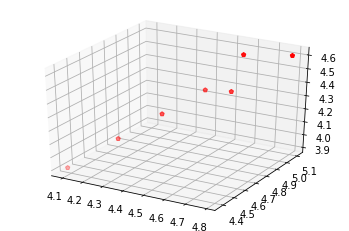

In [18]:
#Question 2E 
from mpl_toolkits.mplot3d import Axes3D
fig = pl.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(douglas.logL, douglas.logQ, douglas.logK, c='r', marker='p')

Text(0, 0.5, 'LogQ Output')

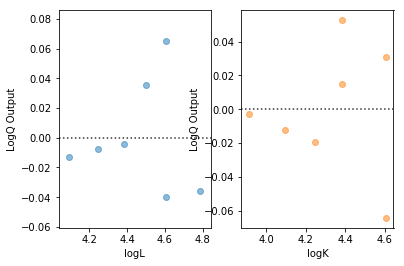

In [31]:
# Residual plots 2D

fig, ax = pl.subplots(1, 2)
ax[0] = sns.residplot('logL', 'logQ', douglas, ax=ax[0], scatter_kws={'alpha': 0.5})
ax[0].set_ylabel('LogQ Output')
ax[1] = sns.residplot('logK', 'logQ', douglas, ax=ax[1], scatter_kws={'alpha': 0.5})
ax[1].set_ylabel('LogQ Output')

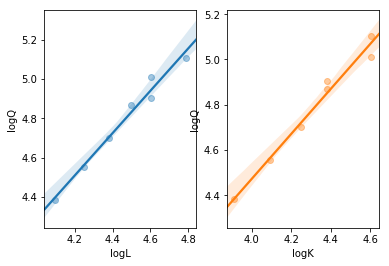

In [33]:
# Modeling Output as a function of Labour and Capital

fig, ax = pl.subplots(1, 2)
sns.regplot('logL', 'logQ', douglas, ax=ax[0], scatter_kws={'alpha': 0.4})
sns.regplot('logK', 'logQ', douglas, ax=ax[1], scatter_kws={'alpha': 0.4})


In [20]:
#Question 2F
regression1 = smf.ols('logQ ~ logL + logK ', data=douglas).fit()
regression1.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   logQ   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     958.4
Date:                Thu, 16 May 2019   Prob (F-statistic):           4.34e-06
Time:                        13:16:55   Log-Likelihood:                 21.712
No. Observations:                   7   AIC:                            -37.42
Df Residuals:                       4   BIC:                            -37.59
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1462      0.114      1.282      0.269      -0.170       0.463
logL           0.5484      0.090      6.127      0.004       0.300       0.797
logK           0.5087      0.083      6.150      0.004       0.279       0.738
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.801
Prob(Omnibus):                    nan   Jarque-Bera (JB):                2.261
Skew:                           1.352   Prob(JB):                        0.323
Kurtosis:                       3.665   Cond. No.                         160.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""